<a href="https://colab.research.google.com/github/Aasawari0309/Machine-Learning/blob/main/Linear_Regression(without_sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload() # Re-upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving Python Resources.zip to Python Resources.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#without using sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split#validation technique

In [ ]:
class LinearRegression:
    def __init__(self):
        self.bias = None
        self.weight = None

    def fit(self, x, y):
        x_mean = x.mean()
        y_mean = y.mean()

        num = 0
        den = 0

        for i in range(len(x)):
            num += (x[i] - x_mean) * (y[i] - y_mean)
            den += (x[i] - x_mean)**2 #denominator should be sum of squared deviations of x

        self.weight = num / den
        self.bias = y_mean - (self.weight * x_mean)


    def predict(self, x_mean):
      # Also , your production formula was using x_mean instead of x
      #It should use actual x values being passed for prediction
        return self.bias + (self.weight * x_mean)


In [ ]:
!kaggle datasets download -d ravitejakotharu/salary-datacsv
!unzip salary-datacsv.zip
df= pd.read_csv('salary_data.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv
License(s): unknown
salary-datacsv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  salary-datacsv.zip
replace salary_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x=np.array(df['YearsExperience'])
y=np.array(df['Salary'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=LinearRegression()
model.fit(np.array(x_train),np.array(y_train))
y_pred=model.predict(x_test)


In [ ]:
print(f'weight:{model.weight}')
print(f'Bias:{model.bias}')

weight:9791.078640668682
Bias:24132.777258946073


Text(0, 0.5, 'Salary')

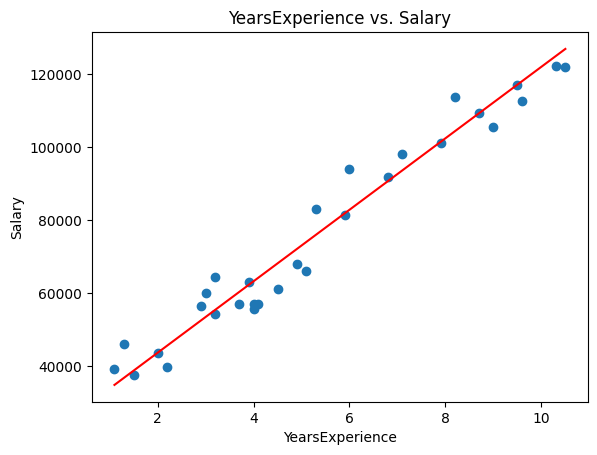

In [ ]:
plt.title('YearsExperience vs. Salary')
plt.scatter(x,y)
plt.plot(x,model.bias+model.weight*x,'r-')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')